In [ ]:
# Bribe Report Scanner project
# ____Problem statement____
# Dataset contains information about the bribes taken from public. All the information
# in this dataset is submitted by public of India. It contains information about department 
# which did the corruption, date, location, amount, views of their post and amount 
# they were forced to give. Analyse the data to find out most bribes paid by city,state,dept.
# Max Average & overall bribe taken by the dept. Bride paid by days,weeks and in the years

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["font.size"]=14
plt.rcParams['figure.figsize']=(10,6)


In [3]:
# Reading the bribe data csv file

df1 = pd.read_csv("Bribe_report.csv")

In [4]:
# Make a copy to keep the source file unchanged
df = df1.copy()

In [ ]:
#About data
# Data contains bribes taken by location wise, dept wise, date wise and the total amount paid.
# Title explains the brief info about the reason behind the bribe taken
# Views gives an insight about how many people viewed the particular bribe data.

In [5]:
# Top 5 records
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [6]:
#Info about the dataset
# 4 object variables and 2 numerical variables
# Total 3473 records of data
# We have got null values in 1 variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


In [7]:
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 3473 rows and 6 columns


## EDA

In [8]:
#checking null values
df.isnull().sum()

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [9]:
#checking the observations having missing values

df[df['Department'].isnull()].head()

,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),15-05-20,"Raipur,Chhattisgarh",NaN,1565,200000


In [10]:
# Number of unique departments
df['Department'].nunique()

367

In [11]:
# Listing the unique departments
df['Department'].value_counts()

Others                                    472
Police Verification for Passport          266
Traffic Violations                        236
Birth Certificate                         155
Traffic Fines, Penalties, Rules           101
                                         ... 
Inspection of Vehicles after Accidents      1
License Renewal                             1
Title Deed                                  1
Extra Charges                               1
Enrolment for Aadhaar Card                  1
Name: Department, Length: 367, dtype: int64

In [12]:
# Impute missing values on department as "Others" since multiple values in  departments are others

In [13]:
df['Department'].fillna('Others',inplace=True)

In [14]:
# Cleared null values
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [15]:
df['Department'].value_counts()

Others                                    516
Police Verification for Passport          266
Traffic Violations                        236
Birth Certificate                         155
Traffic Fines, Penalties, Rules           101
                                         ... 
Inspection of Vehicles after Accidents      1
License Renewal                             1
Title Deed                                  1
Extra Charges                               1
Enrolment for Aadhaar Card                  1
Name: Department, Length: 367, dtype: int64

In [16]:
# Describing the dataset including categorical variables
df.describe(include='all')

,Title,Date,Location,Department,Views,Amount(INR)
count,3473,3473,3473,3473,3473.000000,3.473000e+03
unique,3282,1334,510,367,NaN,NaN
top,Passport verification,7/11/2015,"Bangalore,Karnataka",Others,NaN,NaN
freq,10,37,769,516,NaN,NaN
mean,NaN,NaN,NaN,NaN,3379.405701,3.331083e+04
std,NaN,NaN,NaN,NaN,1540.854884,1.508203e+05
min,NaN,NaN,NaN,NaN,463.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,2081.000000,3.300000e+02
50%,NaN,NaN,NaN,NaN,3272.000000,1.200000e+03
75%,NaN,NaN,NaN,NaN,4522.000000,8.000000e+03


<AxesSubplot:xlabel='Amount(INR)', ylabel='Count'>

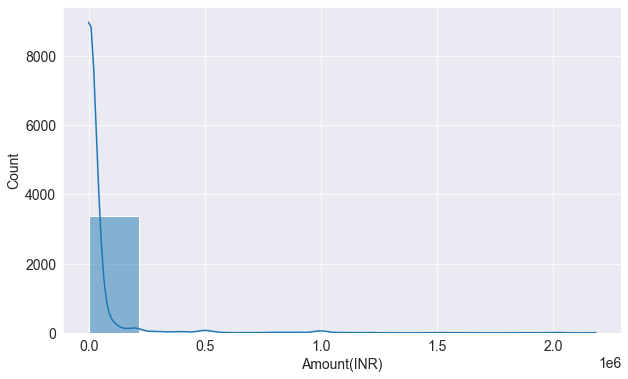

In [17]:
#plot the amount variable to check the highest bribed amount interval

sns.histplot(df['Amount(INR)'],kde=True,bins=10)

<AxesSubplot:xlabel='Amount(INR)', ylabel='Proportion'>

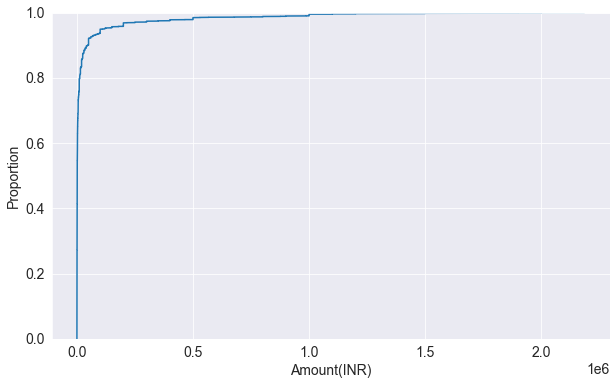

In [18]:
# Plotting the cumulative amount
sns.ecdfplot(df['Amount(INR)'])

In [19]:
# Maximum bribed amount
df['Amount(INR)'].max()

2185000

In [20]:
# 90% of amount
df['Amount(INR)'].quantile(0.90)

45363.200000000084

In [21]:
#Removing outliers
#considering bribe less than 0.9 quantile
df = df[df['Amount(INR)']<df['Amount(INR)'].quantile(0.9)]

In [22]:
df.shape

(3125, 6)

In [23]:
#finding the departments 
df['Department'].unique()

array(['Births, Family and Care', 'Vehicle Insurance',
       'Driving and Transport Business', 'Driving Licenses and Tests',
       'FIR and Complaints', 'Policies and Procedures', 'Others',
       'Police Clearance Certificate', 'Registrations and Licenses',
       'Building and Housing', 'Traffic Fines, Penalties, Rules',
       'Excise', 'Property Registration', 'Loan Sanctioning',
       'Court Related', 'Verification and Certificates', 'Drugs License',
       'Visa', 'Khata', 'College Leaving Certificate', 'Tax and Permits',
       'Autorickshaws', 'Certificates', 'Caste Certificate',
       'Dates for Hearing', 'Aadhaar Card Process', 'Excess Baggage',
       'Traffic Violations', 'Bill Payment', 'Water Connection',
       'Passport Status and Delivery', 'Land Registration',
       'Government Personnel', 'Government Schemes', 'Loans',
       'Marriage Certificate and Registration', 'Police Harassment',
       'Background Verification', 'Services',
       'Change of Tariff in Do

In [24]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [30]:
#split location to city & state

df[['City','State']]=df['Location'].str.split(',',expand=True)


In [33]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR),City,State
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,Siwan,Bihar


In [40]:
#group rows to find the total amount of bribe in each city
most_bribe_area = df.groupby(['City'])['Amount(INR)'].agg(['sum','count']).sort_values('count',ascending=False)

In [51]:
# setting index values to numbers
most_bribe_area.reset_index(inplace=True)

In [52]:
most_bribe_area['City']

0      Bangalore
1       NewDelhi
2        Chennai
3           Pune
4         Mumbai
         ...    
478      Khordha
479      Khammam
480      Katpadi
481     Kashipur
482     Yellandu
Name: City, Length: 483, dtype: object

<AxesSubplot:xlabel='count', ylabel='City'>

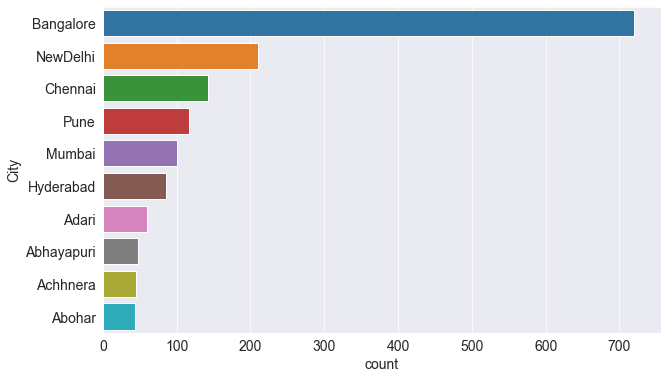

In [53]:
# Plotting the top 10 cities where most bribes paid

sns.barplot(y=most_bribe_area['City'].head(10),x=most_bribe_area['count'])

In [54]:
#group rows to find the total amount of bribe in each state

most_bribe_state = df.groupby(['State'])['Amount(INR)'].agg(['count','sum']).sort_values('count',ascending=False)

In [55]:
# setting index values to numbers
most_bribe_state.reset_index(inplace=True)

In [56]:
most_bribe_state.head(5)

,State,count,sum
0,Karnataka,838,4124357
1,UttarPradesh,357,1170341
2,Maharashtra,350,1454076
3,TamilNadu,299,1335778
4,Delhi,210,626320


<AxesSubplot:xlabel='count', ylabel='State'>

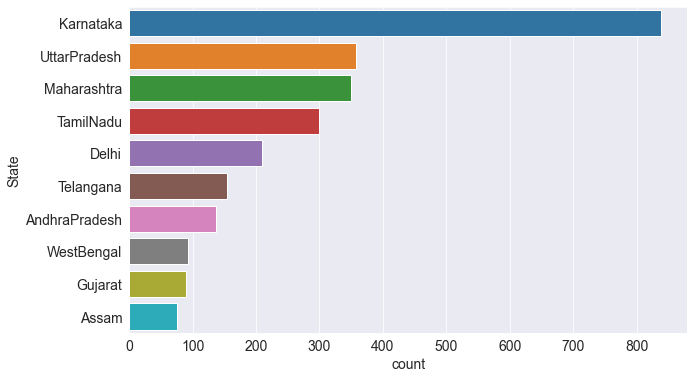

In [57]:
# Plotting the top 10 states where most bribes paid

sns.barplot(y=most_bribe_state['State'].head(10),x=most_bribe_state['count'])

In [67]:
#group rows to find the total amount of bribe in each dept

most_bribe_dept = df.groupby(['Department'])['Amount(INR)'].agg(['count','sum']).sort_values('count',ascending=False)

In [68]:
# setting index values to numbers
most_bribe_dept.reset_index(inplace=True)
most_bribe_dept

,Department,count,sum
0,Others,477,1787443
1,Police Verification for Passport,264,242827
2,Traffic Violations,236,189459
3,Birth Certificate,144,232212
4,"Traffic Fines, Penalties, Rules",101,141369
...,...,...,...
344,Aadhaar Card,1,500
345,Migration Certificate,1,40000
346,Money Order and Passbook,1,1000
347,Motor Vehicle Inspection,1,3500


<AxesSubplot:xlabel='count', ylabel='Department'>

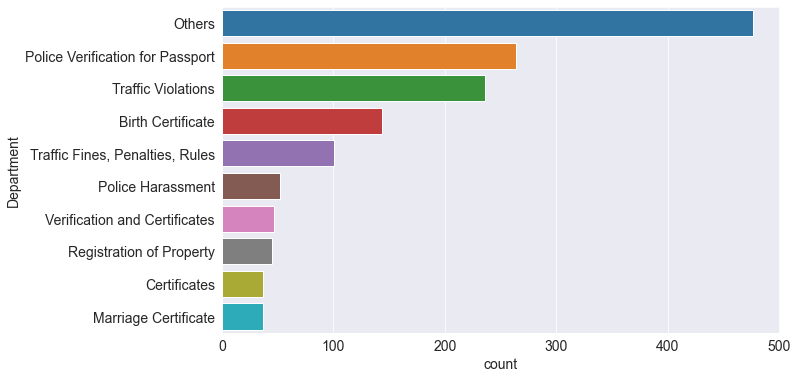

In [69]:
# Plotting the top 10 departments where most bribes paid
sns.barplot(x = most_bribe_dept['count'],y = most_bribe_dept['Department'].head(10))

In [70]:
#group rows to find the avergae and overall amount of bribe in each dept

most_bribe_dept_mean = df.groupby(['Department'])['Amount(INR)'].agg(['mean','sum']).sort_values('mean',ascending=False)

In [73]:
most_bribe_dept_mean.reset_index(inplace=True)

<AxesSubplot:xlabel='mean', ylabel='Department'>

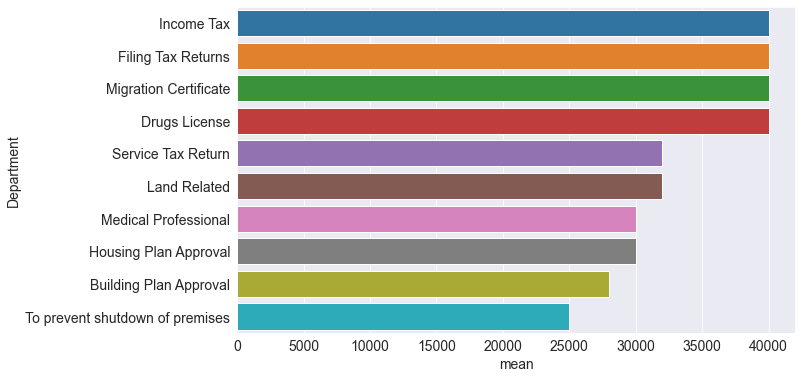

In [74]:
# Plotting the top 10 departments where most bribes paid on an average
sns.barplot(x = most_bribe_dept_mean['mean'],y = most_bribe_dept_mean['Department'].head(10))

In [75]:
# Converting object datatype to date time datatype
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
# New dataframe with only amount and dates
df_day = df[['Date','Amount(INR)']]

In [78]:
df_day.head()

,Date,Amount(INR)
0,2020-10-14,400
1,2020-10-13,350
2,2020-10-13,100
3,2020-10-13,100
4,2020-10-13,15000


In [79]:
import datetime as dt

In [80]:
# Extract the info from datetime data
df_day['Day'] = df_day['Date'].dt.day
df_day['Month'] = df_day['Date'].dt.month

In [117]:
df_day['Year'] = df_day['Date'].dt.year
df_day['Day_Name'] = df_day['Date'].dt.day_name()

In [118]:
"""
dt.day_name()
dt.week
dt.dayofweek
dt.year
dt.month
dt.quarter
"""

'\ndt.day_name()\ndt.week\ndt.dayofweek\ndt.year\ndt.month\ndt.quarter\n'

In [119]:
df_day.head(10)

,Date,Amount(INR),Day,Month,Year,Day_Name
0,2020-10-14,400,14,10,2020,Wednesday
1,2020-10-13,350,13,10,2020,Tuesday
2,2020-10-13,100,13,10,2020,Tuesday
3,2020-10-13,100,13,10,2020,Tuesday
4,2020-10-13,15000,13,10,2020,Tuesday
5,2020-10-13,15000,13,10,2020,Tuesday
6,2020-10-10,5000,10,10,2020,Saturday
7,2020-10-10,500,10,10,2020,Saturday
8,2020-09-10,2500,10,9,2020,Thursday
9,2020-06-10,4000,10,6,2020,Wednesday


In [93]:
#group rows to find the amount of bribe each day

most_bribe_amount_days = df_day.groupby('Day')['Amount(INR)'].agg(['count','sum']).sort_values('sum',ascending =False)


In [97]:
most_bribe_amount_days.reset_index(inplace=True)

In [101]:
most_bribe_amount_days.head()


,Day,count,sum
0,11,224,751450
1,12,100,619575
2,25,108,602779
3,9,91,536490
4,27,115,492519


<AxesSubplot:xlabel='Day', ylabel='sum'>

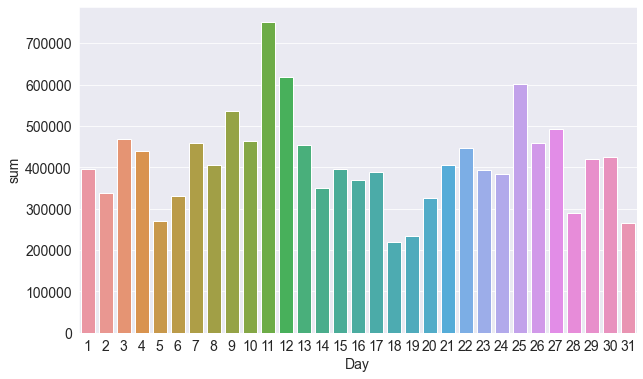

In [112]:
# Plotting bribe amount paid on all days of the month 

sns.barplot(y = most_bribe_amount_days['sum'],x=most_bribe_amount_days['Day'])

In [120]:
#group rows to find the amount of bribe on each days of week

most_bribe_amount_days_week = df_day.groupby('Day_Name')['Amount(INR)'].agg(['count','sum']).sort_values('sum',ascending =False)


In [121]:
most_bribe_amount_days_week.reset_index(inplace=True)

In [122]:
most_bribe_amount_days_week

,Day_Name,count,sum
0,Tuesday,520,2125361
1,Wednesday,513,1981031
2,Friday,425,1947879
3,Saturday,498,1900388
4,Monday,439,1871951
5,Thursday,423,1715406
6,Sunday,307,1267496


<AxesSubplot:xlabel='sum', ylabel='Day_Name'>

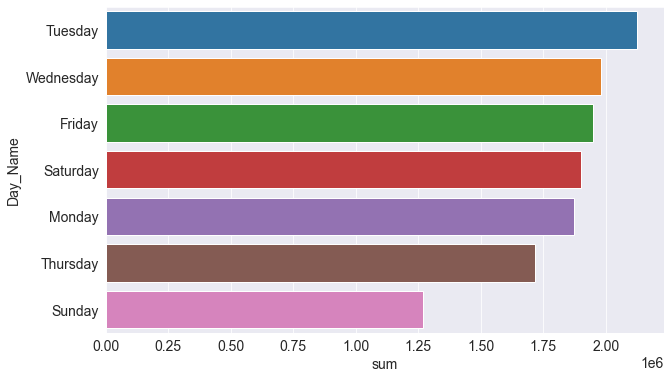

In [124]:
# Plotting bribe amount paid on all days of the week

sns.barplot(x = most_bribe_amount_days_week['sum'],y=most_bribe_amount_days_week['Day_Name'])

In [125]:
#group rows to find the amount of bribe year wise

most_bribe_amount_days_year = df_day.groupby('Year')['Amount(INR)'].agg(['count','sum']).sort_values('sum',ascending =False)


In [126]:
most_bribe_amount_days_year.reset_index(inplace=True)

In [127]:
most_bribe_amount_days_year.head()

,Year,count,sum
0,2019,805,3435002
1,2016,870,3197636
2,2018,454,2188335
3,2017,505,2034136
4,2020,236,1135420


<AxesSubplot:xlabel='Year', ylabel='sum'>

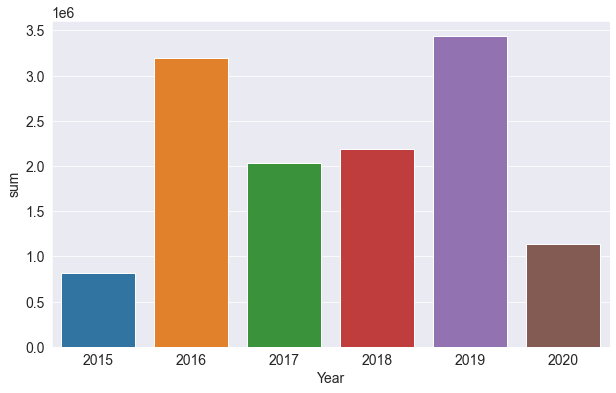

In [129]:
# Plotting bribe amount paid year-wise

sns.barplot(y = most_bribe_amount_days_year['sum'],x=most_bribe_amount_days_year['Year'])

In [ ]:
# Conclusion

# As per the analysis of given bribe data, Bangalore, Karnatake tops the bribe collection and the unidentified department
# "Others" tops the list followed by police verification for passport. On comparing the mean value of departmants,
# Income Tax, Filing tax returns, Migration certificate, Drugs License stands at the top. Looking at the date-wise
# bribe report, 11th day of the month and Tuesday's and year 2019 was paid higher bribe. 

# It is recommended to act upon decreasing the bribe collection by enforcement and bribe surveillance using the insights 
# from this report.
